In [1]:
using Plots

In [2]:
x0 = 3; y0 = 20; v0 = 10; g = 9.81
theta = 30.0 * pi/180
v0x = v0 * cos(theta) 
v0y = v0 * sin(theta)

4.999999999999999

In [3]:
function trajectory(t)
    global x0, y0, v0x, v0y, g
    return[(x0 + v0x * t), (y0 + v0y*t - g*t*t/2)]
end

trajectory (generic function with 1 method)

In [4]:
tmax = 2
numpoints = 100

t = range(start=0, length=numpoints, stop=tmax)

0.0:0.020202020202020204:2.0

In [5]:
rez = trajectory.(t);

In [6]:
rez2D = hcat(rez...)

2×100 Matrix{Float64}:
  3.0   3.17495   3.34991   3.52486  …  19.7956  19.9706  20.1456  20.3205
 20.0  20.099    20.194    20.285       11.248   10.9627  10.6734  10.38

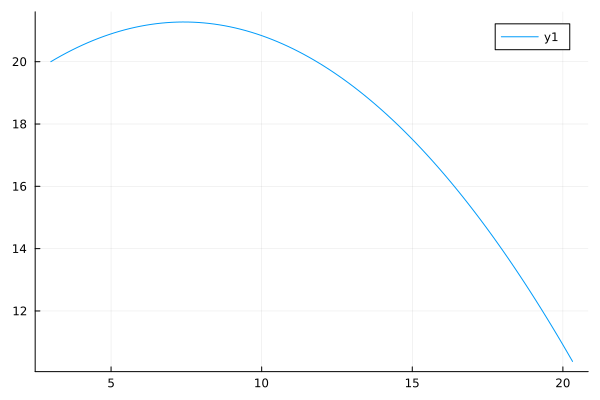

In [7]:
plot(rez2D[1,:], rez2D[2,:])

In [9]:
using DifferentialEquations

In [12]:
function syst!(du,u,p,t)
    du[1] = u[2]
    du[2] = 0
    du[3] = u[4]
    du[4] = -g
end

syst! (generic function with 1 method)

In [14]:
u0 = [x0, v0x, y0, v0y]

4-element Vector{Float64}:
  3.0
  8.660254037844387
 20.0
  4.999999999999999

In [16]:
aruncare = ODEProblem(syst!, u0, (0,tmax))

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 2)
u0: 4-element Vector{Float64}:
  3.0
  8.660254037844387
 20.0
  4.999999999999999

In [17]:
rez2 = solve(aruncare)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 4-element Vector{Float64}:
 0.0
 0.08941992866374718
 0.9836192153012189
 2.0
u: 4-element Vector{Vector{Float64}}:
 [3.0, 8.660254037844387, 20.0, 4.999999999999999]
 [3.7743992982739734, 8.660254037844387, 20.4078796378536, 4.12279049980864]
 [11.518392281013707, 8.660254037844387, 20.17247541522462, -4.649304502104955]
 [20.32050807568877, 8.660254037844387, 10.380000000000065, -14.619999999999994]

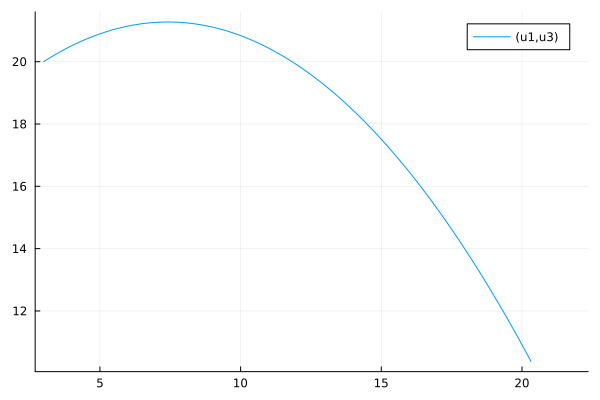

In [21]:
plot(rez2, vars=(1,3))